In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
sns.set_style('darkgrid')

In [12]:
act_df = pd.read_csv('ANLSYS2/single_cell/single_ACT7.csv')
prfdr_df = pd.read_csv('ANLSYS2/single_cell/single_PRFDR10.csv')

# add std info to csv : 
act_std = pd.read_csv('ANLSYS2/single_cell/single_ACT7_std.csv')
prfdr_std = pd.read_csv('ANLSYS2/single_cell/single_PRFDR10_std.csv')

act_df['speed_std'] = act_std.speed
prfdr_df['speed_std'] = prfdr_std.speed

act_df['persist_std'] = act_std.persistance
prfdr_df['persist_std'] = prfdr_std.persistance

prfdr_df['persist'] = prfdr_df.Max_act

print(act_df.columns)
print(prfdr_df.columns)

Index(['Unnamed: 0', 'Lambda', 'Max_act', 'speed', 'persistance',
       'pooled_pers', 'sum_order', 'global_order', 'lcl_order', 'speed_std',
       'persist_std'],
      dtype='object')
Index(['Unnamed: 0', 'Lambda', 'Max_act', 'speed', 'persistance',
       'pooled_pers', 'sum_order', 'global_order', 'lcl_order', 'speed_std',
       'persist_std', 'persist'],
      dtype='object')


In [3]:
act_df.Lambda.unique()
act_df[act_df.Lambda == 1000.]

,Unnamed: 0,Lambda,Max_act,speed,persistance,pooled_pers,sum_order,global_order,lcl_order,speed_std,persist_std
60,60,1000,80.0,3.906128,5.614363,5.554748,569.864995,12.333612,0.602821,0.738047,0.584805
71,71,1000,220.0,2.414708,4.568387,4.541246,313.794228,6.538601,0.346183,0.661802,0.395269
80,80,1000,20.0,7.971872,3.964049,3.947333,3111.393837,24.975220,1.120881,1.052923,0.169244
83,83,1000,50.0,4.883461,5.410004,5.388602,1167.615355,14.112295,0.687190,0.675019,0.355309
93,93,1000,100.0,3.506330,5.372513,5.358232,1111.597083,10.631063,0.512600,0.557802,0.422143
107,107,1000,240.0,2.329073,4.669374,4.612929,508.223518,7.032839,0.343481,0.766047,0.347316
118,118,1000,70.0,4.155762,5.441470,5.382134,612.024068,11.776893,0.643663,0.610222,0.481321
157,157,1000,160.0,2.816232,4.944919,4.877519,616.843273,7.555537,0.420567,0.772557,0.377906
167,167,1000,180.0,2.681392,4.755480,4.725609,933.257705,8.511246,0.427191,0.825111,0.359703
169,169,1000,60.0,4.457484,5.643126,5.618711,2171.366289,13.872456,0.635659,0.534977,0.314100


Text(0.5, 0, 'Lambda')

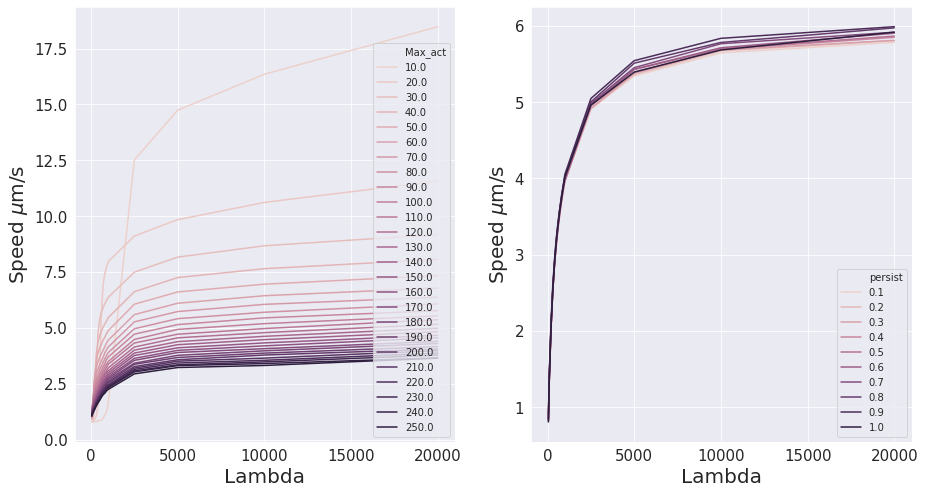

In [18]:
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
g1 = sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = act_df, ax = ax1,legend = 'full')
#ax1.plot(range(0,20000),[5.10] * 20000,c = 'r')
g2 = sns.lineplot(x = 'Lambda',y = 'speed', hue = 'persist',data = prfdr_df, ax = ax2,legend = 'full')
#ax2.plot(range(0,20000),[5.10] * 20000,c = 'r')
ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('Lambda',fontsize = 20)

ax2.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax2.set_xlabel('Lambda',fontsize = 20)

Text(0.5, 0, 'Persist')

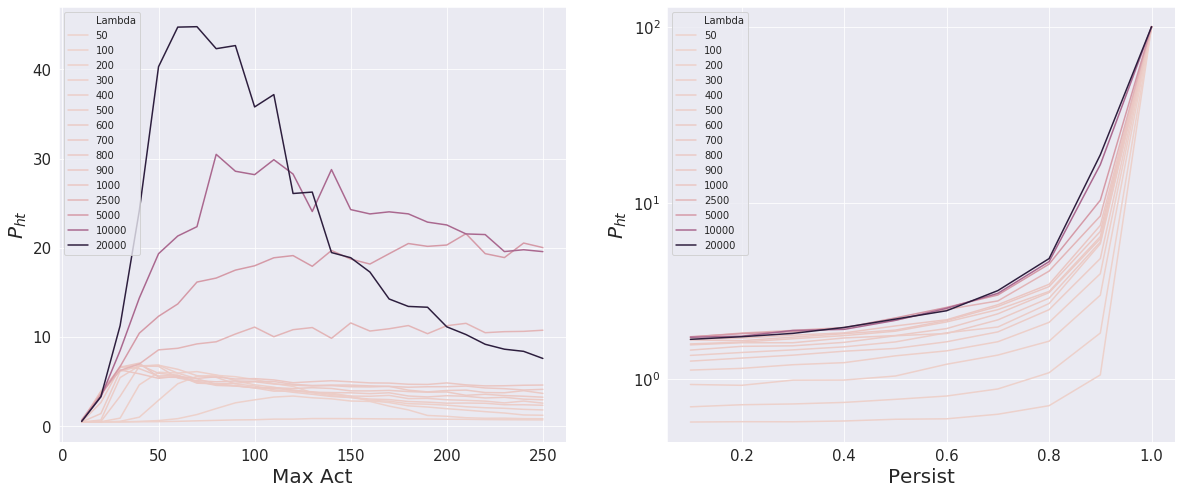

In [13]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
f, (ax1, ax2) = plt.subplots(1,2,figsize = (20,8))
g1 = sns.lineplot(x = 'Max_act',y = 'pooled_pers', hue = 'Lambda',data = act_df, ax = ax1,legend = 'full',)
#ax1.plot(range(0,20000),[5.10] * 20000,c = 'r')
g2 = sns.lineplot(x = 'persist',y = 'pooled_pers', hue = 'Lambda',data = prfdr_df, ax = ax2,legend = 'full')
#ax2.plot(range(0,20000),[5.10] * 20000,c = 'r')
ax1.set_ylabel('$P_{ht}$',fontsize = 20)
ax1.set_xlabel('Max Act',fontsize = 20)
plt.yscale('log')

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('Persist',fontsize = 20)

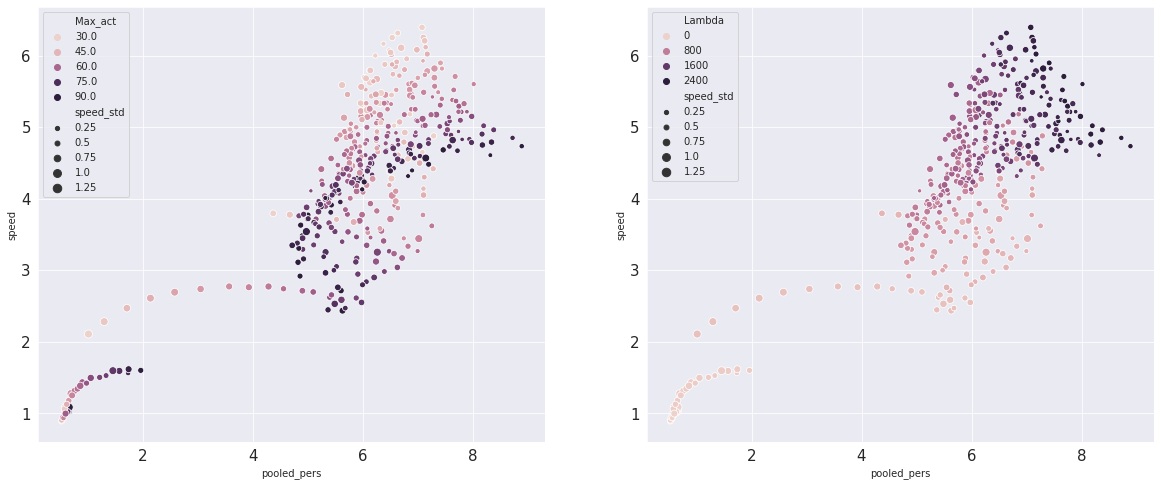

In [10]:
ZOOM_act = pd.read_csv('ANLSYS2/single_cell/single_ACT8.csv')

# add std info to csv : 
ZOOMact_std = pd.read_csv('ANLSYS2/single_cell/single_ACT8_std.csv')

ZOOM_act['speed_std'] = ZOOMact_std.speed
ZOOM_act['persist_std'] = ZOOMact_std.persistance

#plt.figure(figsize = (10,8))
f, (ax1, ax2) = plt.subplots(1,2,figsize = (20,8))
sns.scatterplot(x = 'pooled_pers',y = 'speed', data = ZOOM_act, size = 'speed_std',hue = 'Max_act',ax= ax1)
sns.scatterplot(x = 'pooled_pers',y = 'speed', data = ZOOM_act, size = 'speed_std',hue = 'Lambda',ax= ax2)

# Plot
# # lambda vs speed,persist
# f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
# sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = ZOOM_act, ax = ax1,legend = 'brief')
# sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = ZOOM_act, ax = ax2, legend = 'brief')
# #sns.scatterplot(x = 'Lambda',y = 'pooled_pers',hue = 'Max_act',data = ZOOM_act, ax = ax3, legend = 'full')

# #sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = ZOOM_prfdr, ax = ax1,legend = 'full')
# #sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = ZOOM_prfdr, ax = ax2, legend = 'full')
# ax1.plot(range(0,2000),[5.10] * 2000,c = 'r')
# # ax2.plot(range(0,3000),[3.84] * 3000,c = 'r')
# ax2.plot(range(0,2000),[6.15] * 2000,c = 'r')
plt.show()


Text(0.5, 0, 'Lambda')

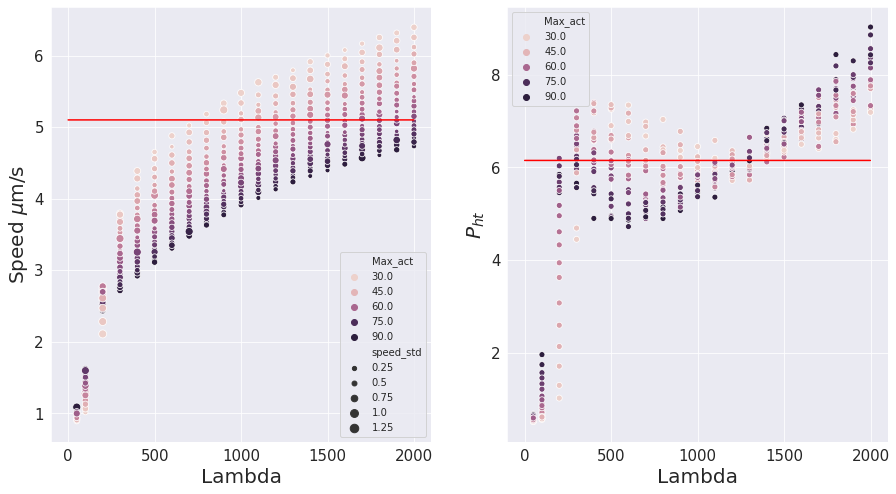

In [20]:
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = ZOOM_act, ax = ax1,legend = 'brief')
sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = ZOOM_act, ax = ax2, legend = 'brief')
ax1.plot(range(0,2000),[5.10] * 2000,c = 'r')
# ax2.plot(range(0,3000),[3.84] * 3000,c = 'r')
ax2.plot(range(0,2000),[6.15] * 2000,c = 'r')

ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('Lambda',fontsize = 20)

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('Lambda',fontsize = 20)